In [474]:
###
# This code answer a question:
# Making a relationship between the number of contacts and campaign success
# what are the relevant points to be observed?
# By Sidon 2018
###

In [475]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn
import scipy
from tabulate import tabulate, tabulate_formats
import prettyprint
from utils import Dataset
%matplotlib inline 

In [476]:
ds =  Dataset()
data = ds.get_data(['campaign','previous','y'])

In [477]:
# Inserir coluna para totalizar os contatos realizados
tt_contacts = data.campaign+data['previous'] 
data.insert(loc=2, column='tt_contacts', value=tt_contacts)

In [478]:
data1 = data.copy()

In [479]:
qs = [.8, .99, .999, 1]
#qs = [0,.8, 1]
data1.tt_contacts = pd.qcut(data['tt_contacts'],qs)

In [480]:
# Convert categories labels to string
data1.tt_contacts.cat.categories = [c.__str__() for c in data1.tt_contacts.cat.categories]

In [481]:
totals = totals = pd.DataFrame(data1.tt_contacts)
totals['y'] = totals.index

In [482]:
# contingency table of observed counts
ct1 = pd.crosstab(data1.y, data1.tt_contacts)

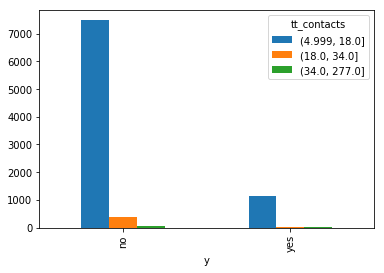

In [483]:
ct1.plot.bar()

In [484]:
# column percentages
colsum=ct1.sum(axis=0)
colpct=ct1/colsum
print(tabulate(colpct, tablefmt='fancy_grid', headers='keys', numalign="center"))

╒═════╤═════════════════╤════════════════╤═════════════════╕
│ y   │  (4.999, 18.0]  │  (18.0, 34.0]  │  (34.0, 277.0]  │
╞═════╪═════════════════╪════════════════╪═════════════════╡
│ no  │    0.869232     │    0.955882    │    0.953488     │
├─────┼─────────────────┼────────────────┼─────────────────┤
│ yes │    0.130768     │   0.0441176    │    0.0465116    │
╘═════╧═════════════════╧════════════════╧═════════════════╛


In [485]:
#colsum
print(tabulate(pd.DataFrame(colsum), tablefmt='fancy_grid', headers=['Range','Contacts'] , numalign="center"))

╒═══════════════╤════════════╕
│ Range         │  Contacts  │
╞═══════════════╪════════════╡
│ (4.999, 18.0] │    8603    │
├───────────────┼────────────┤
│ (18.0, 34.0]  │    408     │
├───────────────┼────────────┤
│ (34.0, 277.0] │     43     │
╘═══════════════╧════════════╛


In [486]:
# G-test
chi2 = {}
cs1= scipy.stats.chi2_contingency(ct1, lambda_="log-likelihood")
chi2['chi-square'] = [cs1[0]]
chi2['p-value'] = [cs1[1]]
chi2['dof'] = [cs1[2]]
chi2['expected'] = [cs1[3]]
print (tabulate(chi2, tablefmt='fancy_grid', headers='keys', numalign="center"))


╒══════════════╤═════════════╤═══════╤══════════════════════════════════════════════════╕
│  chi-square  │   p-value   │  dof  │ expected                                         │
╞══════════════╪═════════════╪═══════╪══════════════════════════════════════════════════╡
│   36.9646    │ 9.40239e-09 │   2   │ [[7.51503501e+03 3.56402916e+02 3.75620720e+01]  │
│              │             │       │  [1.08796499e+03 5.15970842e+01 5.43792799e+00]] │
╘══════════════╧═════════════╧═══════╧══════════════════════════════════════════════════╛
